In [1]:
# import libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get data
# Department column is erroniously named as sales. Renaming the column
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')
df.rename(columns={'sales': 'department'}, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Observations:

1. The HR dataset has 14998 observations and 10 columns.
2. There are no null values in the dataset.
3. There are two categorical columns - department and salary.
4. The remaining variables are all numerical in nature.
5. Numerical variables have different means.
6. Column 'left' is a target column.

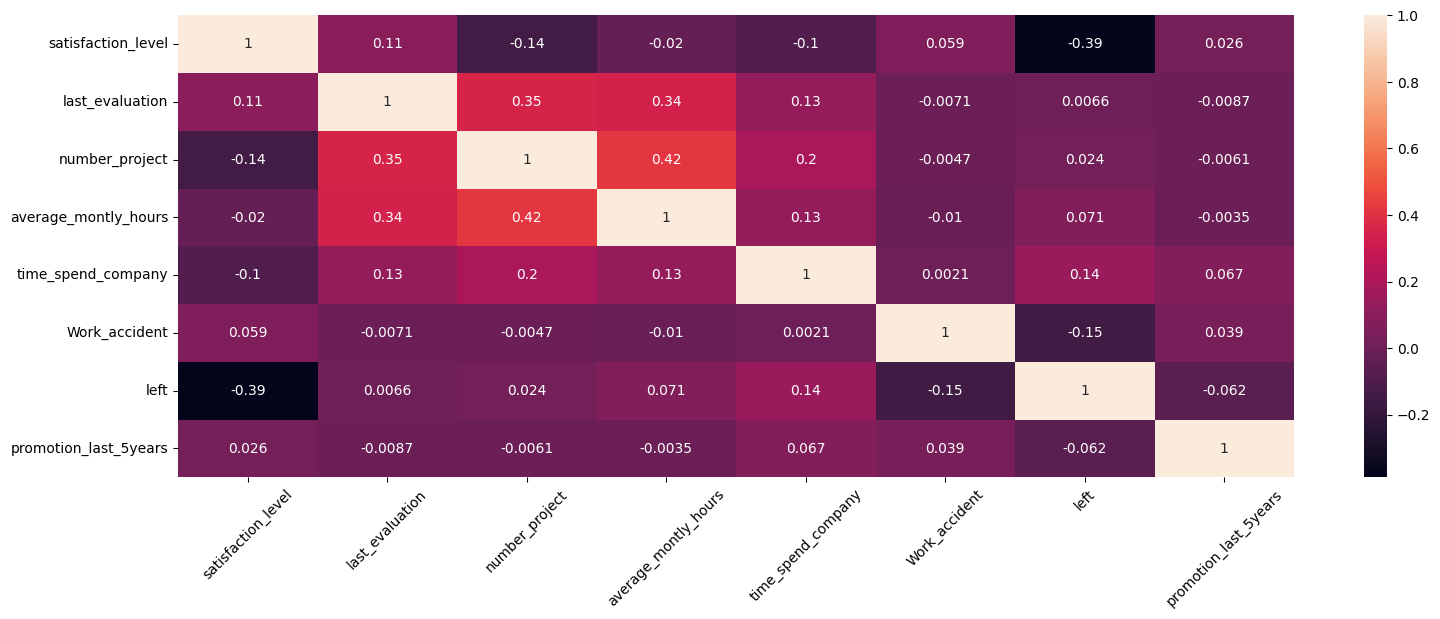

In [6]:
# Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.
fig = plt.figure(figsize = (18, 6))

sns.heatmap(df.corr(numeric_only=True), annot = True)

plt.xticks(rotation = 45)
plt.show()

In [7]:
df.corr(numeric_only=True)['left'].abs().sort_values(ascending=False)

left                     1.000000
satisfaction_level       0.388375
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
Name: left, dtype: float64

In [8]:
# check for variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(['left','department','salary'], axis=1)
#x = x.astype(float)  # Convert the array to float type

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns

vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data.sort_values(by= 'vif', ascending= False))

                Features        vif
1        last_evaluation  19.990183
3   average_montly_hours  18.918397
2         number_project  13.793659
4     time_spend_company   6.550547
0     satisfaction_level   6.186601
5          Work_accident   1.172189
6  promotion_last_5years   1.029476


### Heatmap observation
1. A column **left** has a negative medium correlation with **satisfaction_level**.
2. Additionally,  **Work_accident** and **time_spend_company** have some effect on **left**.

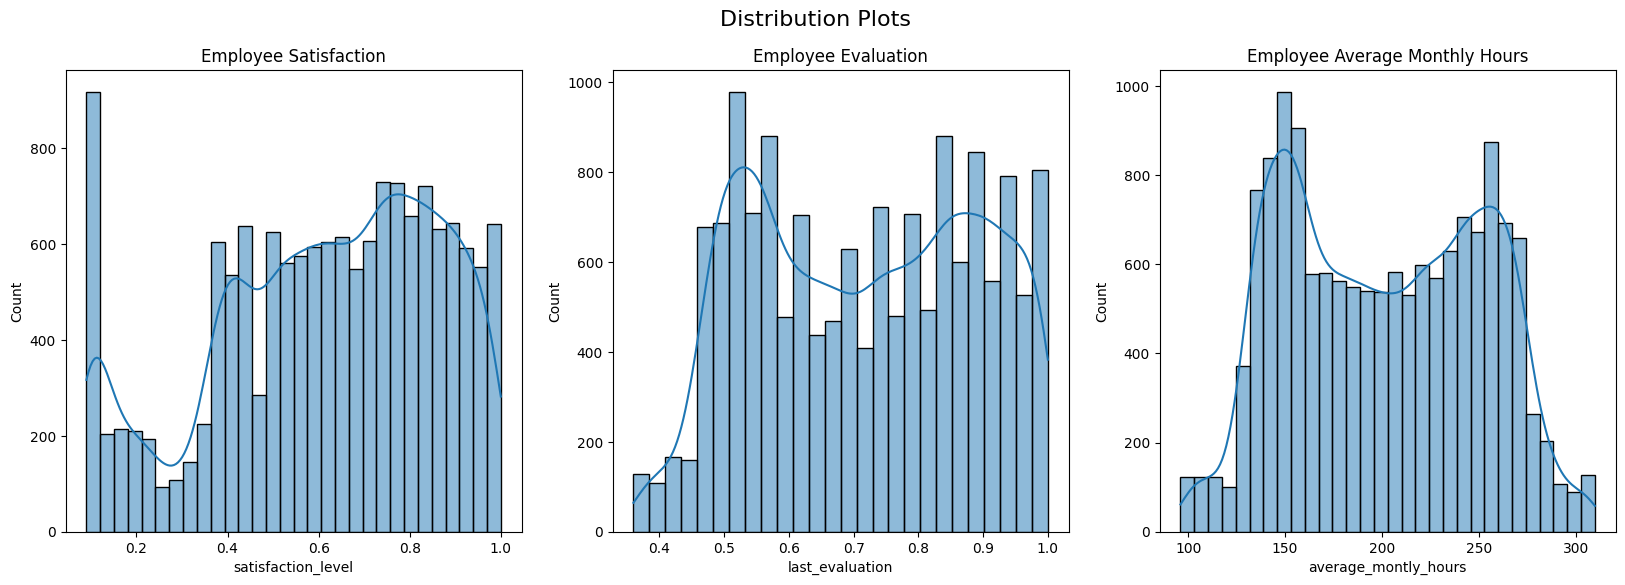

<Figure size 1800x600 with 0 Axes>

In [9]:
# Draw the distribution plot of satisfaction_level, last_evaluation, average_montly_hours

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
plt.figure(figsize = (18, 6))
fig.suptitle('Distribution Plots', fontsize=16)
fig1 = sns.histplot(x = 'satisfaction_level', data = df, kde = True, ax = axes[0])
fig1.set(title = 'Employee Satisfaction')

fig2 = sns.histplot(x = 'last_evaluation', data = df, kde = True, ax = axes[1])
fig2.set(title = 'Employee Evaluation')

fig3 = sns.histplot(x = 'average_montly_hours', data = df, kde = True, ax = axes[2])
fig3.set(title = 'Employee Average Monthly Hours')

plt.show()

### Distribution plots observation
1. The variable last_evaluation and  average_montly_hours follow approx bimodal distribution.
2. The variable satisfaction_level is following an approx multi-modal normal distribution.

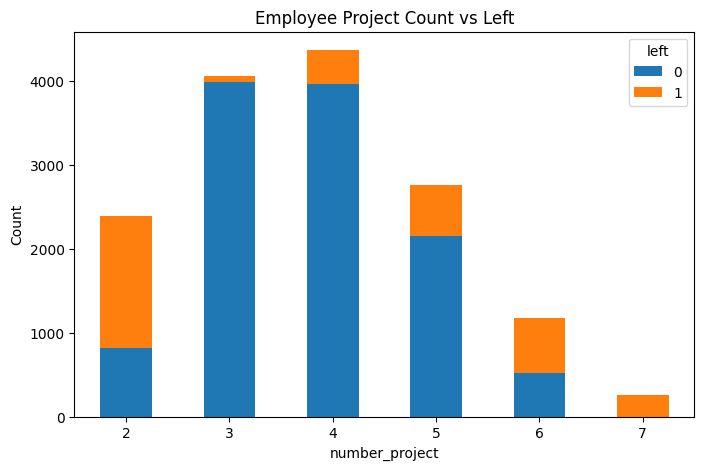

In [10]:
# draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization 

df1= df.groupby(['number_project','left'], as_index= False).size()
df1_pivoted = df1.pivot(index='number_project', columns='left', values='size')
ax = df1_pivoted.plot(figsize=(8,5), kind='bar', stacked=True, rot=0, ylabel = 'Count', title = 'Employee Project Count vs Left')

### Bar Plot Observation
1. Majority of employees leave a company if a number of projects is small.
2. There are few employees who left a company with a number of projects between 3 and 5.
3. If a number of projects exceed 5, employees tend to leave a company.
4. All employees left a company if a number of projects is 7

## Clustering of Employees who left based on their satisfaction and evaluation.

In [11]:
# import clustering module
from sklearn.cluster import KMeans

# filter data for only employees who left a company
df_left = df[(df['left'] ==1)]

# select only necessary columns for a clustering
df_left = df_left[['satisfaction_level','last_evaluation']]
X = df_left.values
X

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [12]:
# create an object with a number of clusters 3
kmn_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmn_model.fit_predict(X)

In [13]:
kmn_model.cluster_centers_

array([[0.41014545, 0.51698182],
       [0.80851586, 0.91170931],
       [0.11115466, 0.86930085]])

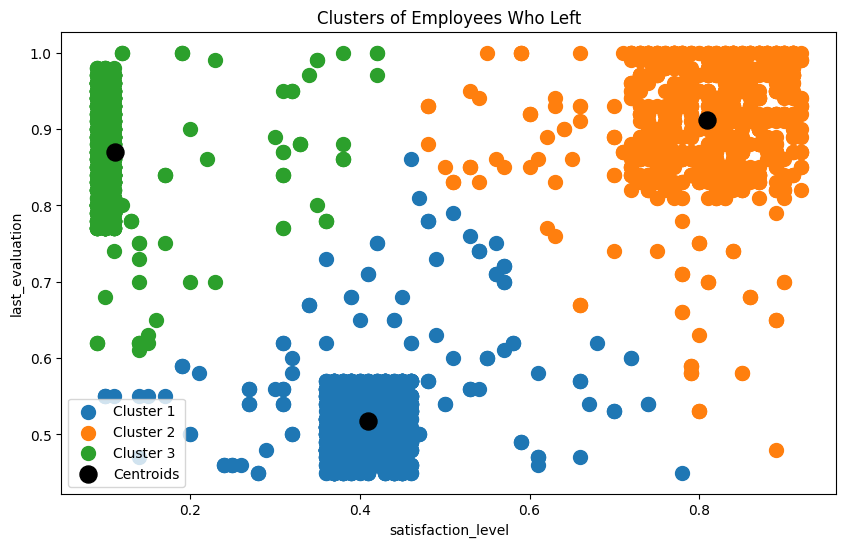

In [14]:
# visualize clusters
plt.figure(figsize = (10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100,  label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(kmn_model.cluster_centers_[:, 0], kmn_model.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters of Employees Who Left')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend(loc = 'best')
plt.show()

### Clustering Observation
1. There are high performers who are not satisfied with their job. 
2. There are low performers who are not satisfied with their job.
3. There are employees who show high performance and job satisfaction. Probably, there are additional factors that affect employees' attrition rate.

## Applying SMOTE Technique

In [15]:
#  separate categorical variables and numeric variables
numerical_columns_df = df.drop(columns=['department', 'salary'])
categorical_columns_df = pd.get_dummies(df[['department','salary']] ,dtype = 'int32',drop_first=True)

In [16]:
categorical_columns_df.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [17]:
# combine both numerical and categorical data frames
combined_df = pd.concat([numerical_columns_df,categorical_columns_df],axis=1)
combined_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [18]:
# Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

from sklearn.model_selection import train_test_split

# set x and y
X = combined_df.drop(columns=['left'])
y =  combined_df['left']

# perform splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [19]:
# perform data standartization and transform train and test data 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)

X_train_transform = pd.DataFrame(ss.transform(X_train), columns = X_train.columns)

X_test_transform = pd.DataFrame(ss.transform(X_test), columns = X_train.columns)

In [20]:
X_train_transform.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,-1.862862,-1.900843,0.97280,0.563659,0.344888,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,1.630066,-0.421065,-0.471981,1.021823,-0.872167
1,-2.104377,0.555873,1.78594,1.124295,0.344888,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,-0.613472,2.374929,-0.471981,1.021823,-0.872167
2,-0.172258,-1.315910,-1.46662,0.723841,-1.027914,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,-0.613472,2.374929,-0.471981,1.021823,-0.872167
3,0.954811,-0.730978,-1.46662,1.264454,-1.027914,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,-0.613472,2.374929,-0.471981,1.021823,-0.872167
4,-1.822610,0.029434,0.15966,-0.177181,1.717690,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,1.630066,-0.421065,-0.471981,-0.978643,-0.872167


In [21]:
# Apply SMOTE technic and fit data
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_transform_os, y_train_os = oversample.fit_resample(X_train_transform, y_train)

In [22]:
# check data before and after SMOTE technic
print(f'old label count: \n{y_train.value_counts()}\n')
print(f'new label count: \n{y_train_os.value_counts()}')

old label count: 
left
0    9142
1    2857
Name: count, dtype: int64

new label count: 
left
0    9142
1    9142
Name: count, dtype: int64


## Perform 5-Fold cross-validation model training and evaluate performance

In [23]:
# import required libriaries

from numpy import mean, std

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [24]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create param list for each model in order to be used with a functions

model_list = [
    {
        "model_name": 'Logistic Regression',
        "model": LogisticRegression(),
        "params":{
             "multi_class":['auto', 'ovr'],
             "solver":['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
         }
    },
    {
        "model_name": 'Random Forest Classifier ',
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[10, 15, 20, 25],
            "criterion":['gini', 'entropy', 'log_loss'],
            "max_depth": [None,3,4,5,6]
        }
    },
    {
        "model_name": 'Gradient Boosting Classifier',
        "model":GradientBoostingClassifier(),
        "params":{
            "loss":['log_loss', 'exponential'],
            "criterion":['friedman_mse', 'squared_error'],
     }
    },
    {
        "model_name": 'XGBC Classifier',
        "model":XGBClassifier(),
        "params":{
            "booster":['gbtree', 'gblinear', 'dart'],
            "max_depth": [2,5,6],
     }
    },
]

In [25]:
# create a function to train a model using GridSearchCV
def grid_cv_apply(model_dict, cv, x_train, y_train, x_test):
    estimator = model_dict["model"]
    param_grid = model_dict["params"]
    
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid,cv=cv,verbose=1,scoring='recall'#'precision' #'accuracy'
                       )
    grid.fit(x_train, y_train)
    y_pred_test = grid.predict(x_test)
    
    return grid, y_pred_test

# create a function to display a classificaiton report
def plot_classification_report(report, name):
    
    # Convert classification report to DataFrame
    df_report = pd.DataFrame(report).transpose()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'Classification Report for {name} model')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

# create a function to display GridSearch best parameters and accuracy
def grid_search_display(grid_object, model_name):
    print(f'\nBest parameter for {model_name} (CV score=%0.3f):' % grid_object.best_score_)
    print(grid_object.best_params_)

# create a function to create a classification report and plot it
def class_report_display(y_test, y_pred, model_name):
    clr = classification_report(y_test, y_pred)
    
    clr_dic = classification_report(y_test, y_pred, output_dict=True)
    
    print("Classification Report:")
    print(clr, '\n')

    plot_classification_report(clr_dic, model_name)

In [26]:
# train logistic regression model
log_grid_obj, log_y_pred_test = grid_cv_apply(model_list[0], cv, X_train_transform_os, y_train_os, X_test_transform)

# display best parameters and a score
grid_search_display(log_grid_obj, model_list[0]["model_name"])


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameter for Logistic Regression (CV score=0.796):
{'multi_class': 'auto', 'solver': 'liblinear'}


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.81      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000
 



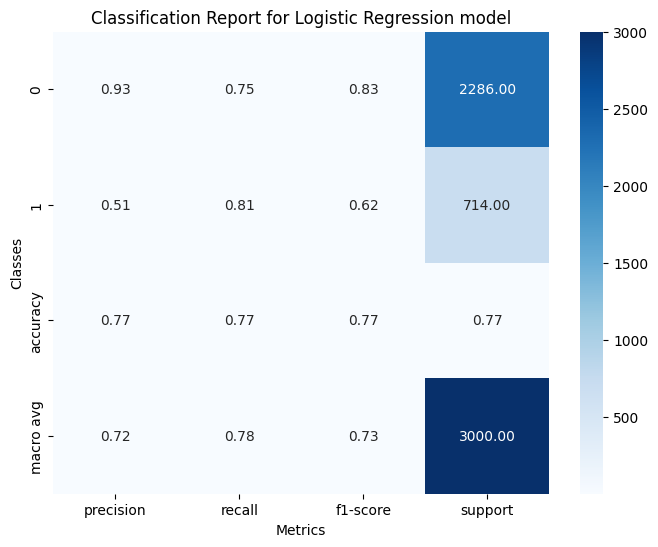

In [27]:
# create a classification report for a logistic regression model and diplay it

class_report_display(y_test, log_y_pred_test, model_list[0]["model_name"])

In [28]:
# train a Random Forest Classifier model 
rfc_grid_obj, rfc_y_pred_test = grid_cv_apply(model_list[1], cv, X_train_transform_os, y_train_os, X_test_transform)

# display best parameters and a score
grid_search_display(rfc_grid_obj, model_list[1]["model_name"])

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameter for Random Forest Classifier  (CV score=0.979):
{'criterion': 'gini', 'max_depth': None, 'n_estimators': 15}


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000
 



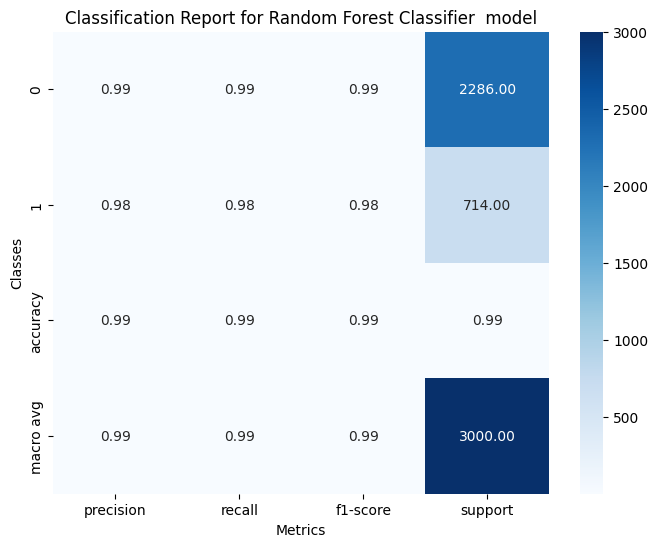

In [29]:
# create a classification report for a Random Forest Classifier model and diplay it

class_report_display(y_test, rfc_y_pred_test, model_list[1]["model_name"])

In [30]:
# train a Gradient Boosting Classifier  
gbc_grid_obj, gbc_y_pred_test = grid_cv_apply(model_list[2], cv, X_train_transform_os, y_train_os, X_test_transform)

# display best parameters and a score
grid_search_display(gbc_grid_obj, model_list[2]["model_name"])

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameter for Gradient Boosting Classifier (CV score=0.958):
{'criterion': 'friedman_mse', 'loss': 'log_loss'}


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000
 



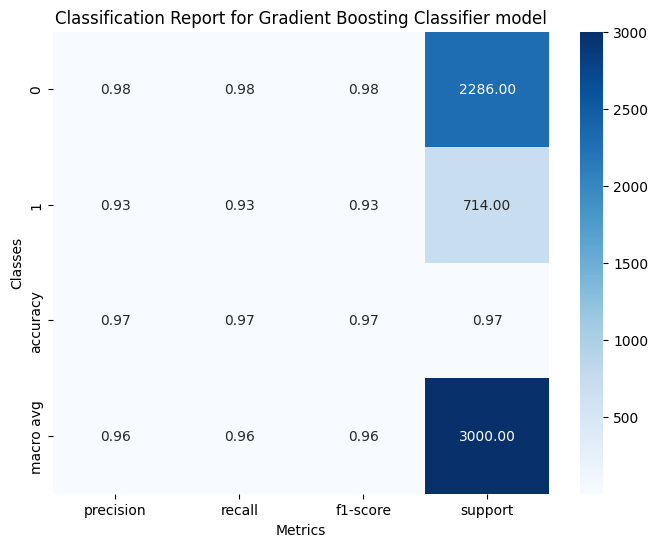

In [31]:
# create a classification report for a Gradient Boosting Classifier model and diplay it

class_report_display(y_test, gbc_y_pred_test, model_list[2]["model_name"])

In [32]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# train XGboost clasiffier model
xgb_grid_obj, xgb_y_pred_test = grid_cv_apply(model_list[3], cv, X_train_transform_os, y_train_os, X_test_transform)

# display best parameters and a score
grid_search_display(xgb_grid_obj, model_list[3]["model_name"])

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameter for XGBC Classifier (CV score=0.981):
{'booster': 'gbtree', 'max_depth': 6}


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.98      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.98      0.99      3000
 



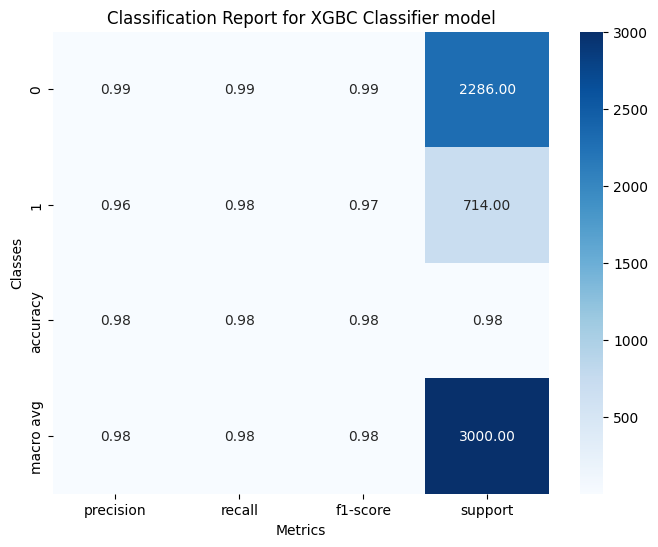

In [33]:
# create a classification report for a xgboost Classifier model and diplay it

class_report_display(y_test, xgb_y_pred_test, model_list[3]["model_name"])

## Identify the best model and justify the evaluation metrics used. 

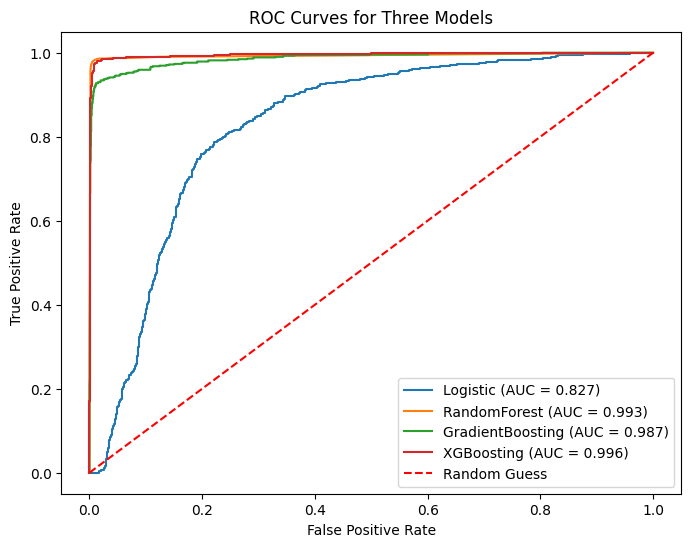

In [34]:
# Find the ROC/AUC for each model and plot the ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predict probabilities for the positive class
y_pred_proba_log = log_grid_obj.predict_proba(X_test_transform)[:, 1]
y_pred_proba_rfc = rfc_grid_obj.predict_proba(X_test_transform)[:, 1]
y_pred_proba_gbc = gbc_grid_obj.predict_proba(X_test_transform)[:, 1]
y_pred_proba_xgb = xgb_grid_obj.predict_proba(X_test_transform)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_proba_log, 
     'RandomForest': y_pred_proba_rfc, 
     'GradientBoosting': y_pred_proba_gbc,
     'XGBoosting': y_pred_proba_xgb
    })

  
# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
 
for model in ['Logistic', 'RandomForest', 'GradientBoosting', 'XGBoosting']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.3f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Models')
plt.legend()
plt.show()

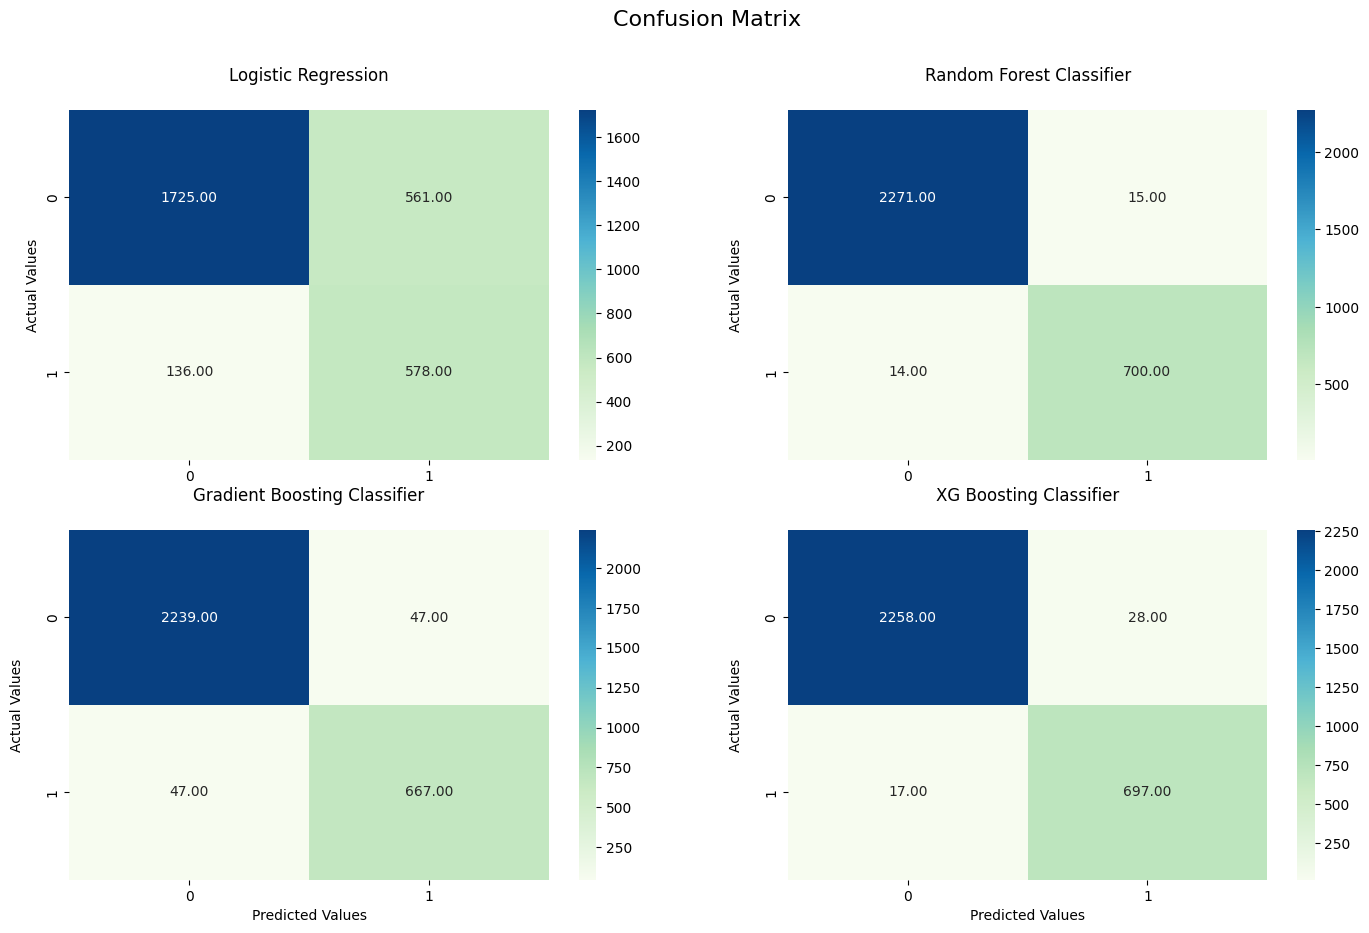

In [35]:
from sklearn.metrics import confusion_matrix

#accuracy_score,precision_score,confusion_matrix
# Vizualize confution matrixes
fig, axes = plt.subplots(2, 2, figsize = (17, 10))
fig.suptitle('Confusion Matrix', fontsize=16, y = 0.98)

fx1=sns.heatmap(confusion_matrix(y_test,log_y_pred_test), annot=True, fmt=".2f",cmap="GnBu", ax = axes[0, 0])
fx1.set_title('Logistic Regression\n');
# fx1.set_xlabel('Predicted Values')
fx1.set_ylabel('Actual Values')

fx2=sns.heatmap(confusion_matrix(y_test,rfc_y_pred_test), annot=True, fmt=".2f",cmap="GnBu", ax = axes[0, 1])
fx2.set_title('Random Forest Classifier\n');
# fx2.set_xlabel('Predicted Values')
fx2.set_ylabel('Actual Values\n')

fx3=sns.heatmap(confusion_matrix(y_test,gbc_y_pred_test), annot=True, fmt=".2f",cmap="GnBu", ax = axes[1,0])
fx3.set_title('Gradient Boosting Classifier\n');
fx3.set_xlabel('Predicted Values')
fx3.set_ylabel('Actual Values\n')

fx4=sns.heatmap(confusion_matrix(y_test,xgb_y_pred_test), annot=True, fmt=".2f",cmap="GnBu", ax = axes[1,1])
fx4.set_title('XG Boosting Classifier\n');
fx4.set_xlabel('Predicted Values')
fx4.set_ylabel('Actual Values\n')

plt.show()

In [47]:
# find recall score for all models

from sklearn.metrics import recall_score, precision_score

# recall score for each model
log_recall_score = recall_score(y_test,log_y_pred_test)
rfc_recall_score = recall_score(y_test,rfc_y_pred_test)
gbc_recall_score = recall_score(y_test,gbc_y_pred_test)
xgb_recall_score = recall_score(y_test,xgb_y_pred_test)

# precistion score for each model
log_precision_score = precision_score(y_test,log_y_pred_test)
rfc_precision_score = precision_score(y_test,rfc_y_pred_test)
gbc_precision_score = precision_score(y_test,gbc_y_pred_test)
xgb_precision_score = precision_score(y_test,xgb_y_pred_test)

model_list = [
     ['Logistic Regression', log_recall_score, log_precision_score],
     ['RandomForest', rfc_recall_score, rfc_precision_score],
     ['GradientBoosting', gbc_recall_score, gbc_precision_score],
     ['XGBoosting', xgb_recall_score, xgb_precision_score]
]


for item in model_list:
    print(f'Recall Score for {item[0]} is {item[1]} and a precisition score is {item[2]}')

Recall Score for Logistic Regression is 0.8095238095238095 and a precisition score is 0.5074626865671642
Recall Score for RandomForest is 0.9803921568627451 and a precisition score is 0.9790209790209791
Recall Score for GradientBoosting is 0.9341736694677871 and a precisition score is 0.9341736694677871
Recall Score for XGBoosting is 0.9761904761904762 and a precisition score is 0.9613793103448276


### Confusion Matrix/Classification Report Observation

1. As the goal is to retain employees who are tend to leave a company, the best metrics is recall score.
2. Recall metrics shows how many relevant instances were retrieved (True Positive (TP) / True Positive (TP) + False Negative). 
3. Based on a classification report and confustion matrix, the least performing model is a Logistic Regression. Its accuracy is 77% and a recall score is 81%.
4. There are top 3 models with high accuracy and high recall score - Random Forest Classifier, Gradient Boosting Classifier and XGBoost Classifier.
5. Among top performers, Random Forest Classifier has the highest recall score - 98.04%.
6. Precision score for a Random Forest Classifier model is also high 98%.

## Employee Categorization

In [108]:
#  categorize the employees into four zones for a test data
# use Random forest model for the categorization as a top performer

# create a dataframe with probability for each employee in a test data
left_prediction = pd.DataFrame(y_pred_proba_rfc, columns = ['left_predict_prob'])

# create a column with categories for employees
left_prediction['risk_zone'] = np.where(
    left_prediction['left_predict_prob'] >= 0.9, 'high',
        np.where(left_prediction['left_predict_prob'] >= 0.6, 'medium',
                 np.where(left_prediction['left_predict_prob'] >= 0.2, 'low','safe'
                         )
                )
)

left_prediction.head()

,left_predict_prob,risk_zone
0,0.000000,safe
1,0.333333,low
2,0.000000,safe
3,0.000000,safe
4,0.000000,safe


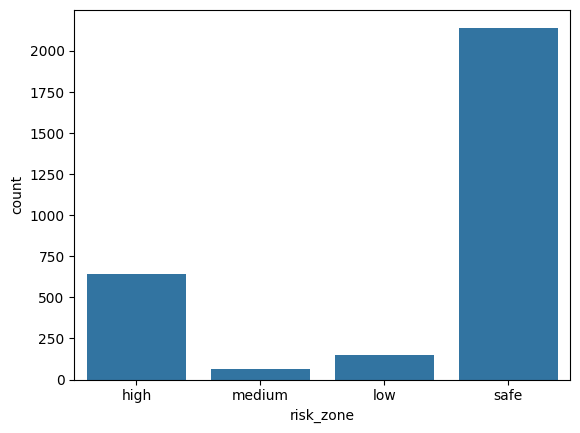

In [116]:
sns.countplot(left_prediction, x="risk_zone",
              order = ['high', 'medium', 'low','safe'],
             )
plt.show()